# <center>Machine Learning with the Experts: School Budgets</center>

[Data Camp Link](https://www.datacamp.com/courses/machine-learning-with-the-experts-school-budgets)

[Chapter 1: Exploring the raw data](#Chapter-1:-Exploring-the-raw-data) <br>
[Chapter 2: Creating a simple first model](#Chapter-2:-Creating-a-simple-first-model) <br>
[Chapter 3: Improving your model](#Chapter-3:-Improving-your-model) <br>
[Chapter 4: Learning from the experts](#Chapter-4:-Learning-from-the-experts)

In [1]:
# all main imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 1: Exploring the raw data

### What category of problem is this?

You're no novice to data science, but let's make sure we agree on the basics.

As Peter from DrivenData explained in the video, you're going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. `Function: Career & Academic Counseling`, or `Position_Type: Librarian`.

Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.

What type of machine learning problem is this?

#### Possible Answers

- Reinforcement Learning, because the model is learning from the data through a system of rewards and punishments.
- Unsupervised Learning, because the model doesn't output labels with certainty.
- Unsupervised Learning, because not all data is correctly classified to begin with.
- **Supervised Learning, because the model will be trained using labeled examples**.

----

### What is the goal of the algorithm?

As you know from previous courses, there are different types of supervised machine learning problems. In this exercise you will tell us what type of supervised machine learning problem this is, and why you think so.

Remember, your goal is to correctly label budget line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.

#### Possible Answers

- Regression, because the model will output probabilities.
- **Classification, because predicted probabilities will be used to select a label class**.
- Regression, because probabilities take a continuous value between 0 and 1.
- Classification, because the model will output probabilities.

Specifically, we have ourselves a **multi-class-multi-label classification problem** (quite a mouthful!), because there are 9 broad categories that each take on many possible sub-label instances.

----

## About the Data (Read Carefully)

Here, I will transform main `TrainingData.csv` which is ~125MB to the version this course uses it. If you want to do the same uncomment below, and run it. However, for memory issues, I will make Pandas read the processed (truncated) file directly.

In [2]:
### read the numbers from preprocessed_indexes.txt file
### with header=None, get the values, and make it 1D 
### using .flatten() function

# my_list = pd.read_csv('data/preprocessed_indexes.txt', header=None).values.flatten()

In [3]:
### read the big data file.
# df = pd.read_csv('data/TrainingData.csv', index_col=0)

### get only observations that match index 
### numbers acquired from IPython Shell in DataCamp
### and sort the index
# new_df = df[df.index.isin(my_list)].sort_index()

### and export it to .csv
# new_df.to_csv('data/TrainingData_processed.csv')

Now you can use `data/TrainingData_processed.csv` for the question.

----

### Loading the data

Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as `pd`) to load your data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

The training data is available as `TrainingData.csv`. Your first task is to load it into a DataFrame in the IPython Shell using `pd.read_csv()` along with the keyword argument `index_col=0`.

Use methods such as `.info()`, `.head()`, and `.tail()` to explore the budget data and the properties of the features and labels.

Some of the column names correspond to **features** - descriptions of the budget items - such as the `Job_Title_Description` column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item **labels** you will be trying to predict with your model. For example, the `Object_Type` column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

Use `df.info()` in the IPython Shell to answer the following questions:

- How many rows are there in the training data?
- How many columns are there in the training data?
- How many non-null entries are in the `Job_Title_Description` column?

#### Instructions

Possible Answers

- 25 rows, 1560 columns, 1560 non-null entries in `Job_Title_Description`.
- 25 rows, 1560 columns, 1131 non-null entries in `Job_Title_Description`.
- **1560 rows, 25 columns, 1131 non-null entries in `Job_Title_Description`**.
- 1560 rows, 25 columns, 1560 non-null entries in `Job_Title_Description`.

In [4]:
# read the data
df = pd.read_csv('data/TrainingData_processed.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 450277
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
F

In [5]:
df.head(3)

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82,Instruction - Regular,General Purpose School,NaN


----

### Summarizing the data

You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called `df`.

You can use `df.info()` in the IPython Shell to determine which columns of the data are numeric, specifically type `float64`. You'll notice that there are two numeric columns, called `FTE` and `Total`.

- `FTE`: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
- `Total`: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null `FTE` column to see the distribution of part-time and full-time employees in the dataset.

*This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [Scikit-Learn Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116) and keep it handy!*

#### Instructions

- Print summary statistics of the numeric columns in the DataFrame `df` using the `.describe()` method.
- Import `matplotlib.pyplot` as `plt`.
- Create a histogram of the non-null `'FTE'` column. You can do this by passing `df['FTE'].dropna()` to `plt.hist()`.
- The title has been specified and axes have been labeled, so hit 'Submit Answer' to see how often school employees work full-time!

              FTE         Total
count  449.000000  1.542000e+03
mean     0.493532  1.446867e+04
std      0.452844  7.916752e+04
min     -0.002369 -1.044084e+06
25%      0.004310  1.108111e+02
50%      0.440000  7.060299e+02
75%      1.000000  5.347760e+03
max      1.047222  1.367500e+06


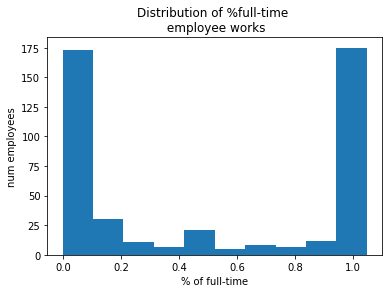

In [6]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the `FTE` column is bimodal. That is, there are some part-time and some full-time employees.

----

### Exploring datatypes in pandas

It's always good to know what datatypes you're working with, especially when the inefficient pandas type `object` may be involved. Towards that end, let's explore what we have.

The data has been loaded into the workspace as `df`. Your job is to look at the DataFrame attribute `.dtypes` in the IPython Shell, and call its `.value_counts()` method in order to answer the question below.

Make sure to call `df.dtypes.value_counts()`, and not `df.value_counts()`! Check out the difference in the Shell. `df.value_counts()` will return an error, because it is a *Series* method, not a *DataFrame* method.

How many columns with dtype `object` are in the data?

#### Possible Answers

- 2.
- **23**.
- 64.
- 25.

In [7]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

----

### Encode the labels as categorical variables

Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient `object type`. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has [many possible values it can take](https://www.drivendata.org/competitions/4/box-plots-for-education/page/15/#labels_list). The 9 labels have been loaded into a list called `LABELS`. In the Shell, check out the type for these labels using `df[LABELS].dtypes`.

You will notice that every label is encoded as an object datatype. Because `category` datatypes are [much more efficient](http://matthewrocklin.com/blog/work/2015/06/18/Categoricals) your task is to convert the labels to category types using the `.astype()` method.

Note: `.astype()` only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the `.apply()` method and provide a `lambda` function called `categorize_label` that applies `.astype()` to each column, `x`.

#### Instructions

- Define the lambda function `categorize_label` to convert column `x` into `x.astype('category')`.
- Use the `LABELS` list provided to convert the subset of data `df[LABELS]` to categorical types using the `.apply()` method and `categorize_label`. Don't forget `axis=0`.
- Print the converted `.dtypes` attribute of `df[LABELS]`.

In [8]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

In [9]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


----

### Counting unique labels

As Peter mentioned in the video, there are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

The dataframe `df` and the `LABELS` list have been loaded into the workspace; the `LABELS` columns of `df` have been converted to category types.

pandas, which has been pre-imported as `pd`, provides a `pd.Series.nunique` method for counting the number of unique values in a Series.

#### Instructions

- Create the DataFrame `num_unique_labels` by using the `.apply()` method on `df[LABELS]` with `pd.Series.nunique` as the argument.
- Create a bar plot of `num_unique_labels` using pandas' `.plot(kind='bar')` method.
- The axes have been labeled for you, so hit 'Submit Answer' to see the number of unique values for each label.

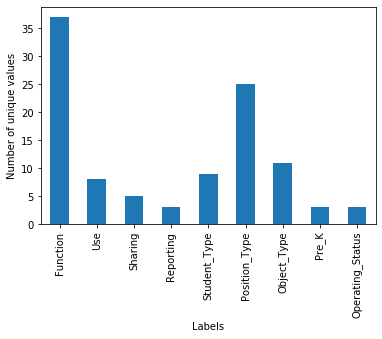

In [10]:
# Import matplotlib.pyplot
# import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

That's a lot of labels to work with. How will you measure success with these many labels?

----

### Penalizing highly confident wrong answers

As Peter explained in the video, log loss provides a steep penalty for predictions that are both wrong and confident, i.e., a high probability is assigned to the incorrect class.

Suppose you have the following 3 examples:

<center>$A:y=1,p=0.85$</center>

<center>$B:y=0,p=0.99$</center>

<center>$C:y=0,p=0.51$</center>

Select the ordering of the examples which corresponds to the lowest to highest log loss scores. `y` is an indicator of whether the example was classified correctly. You shouldn't need to crunch any numbers!

#### Possible Answers

- Lowest: A, Middle: B, Highest: C.
- Lowest: C, Middle: A, Highest: B.
- **Lowest: A, Middle: C, Highest: B**.
- Lowest: B, Middle: A, Highest: C.

Of the two incorrect predictions, `B` will have a higher log loss because it is confident and wrong.

----

### Computing log loss with NumPy

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function `compute_log_loss()`, which Peter showed you in the video.

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: `actual_labels`, `correct_confident`, `correct_not_confident`, `wrong_not_confident`, and `wrong_confident`.

Your job is to compute the log loss for each sample set provided using the `compute_log_loss(predicted_values, actual_values)`. It takes the predicted values as the first argument and the actual values as the second argument.

#### Instructions

- Using the `compute_log_loss()` function, compute the log loss for the following predicted values (in each case, the actual values are contained in `actual_labels)`:
    - `correct_confident`.
    - `correct_not_confident`.
    - `wrong_not_confident`.
    - `wrong_confident`.
    - `actual_labels`.

In [11]:
# define compute_log_loss
import numpy as np 

def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and actual when these are 1D arrays.
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our predicted values slightly by eps from 0 or 1.     
    """    
    predicted = np.clip(predicted, eps, 1 - eps)     
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))    
    return loss

In [12]:
# prepare those arrays.
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [13]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss))

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models

----

# Chapter 2: Creating a simple first model

### Setting up a train-test split in scikit-learn

Alright, you've been patient and awesome. It's finally time to start training models!

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least `min_count` examples of each label appear in each split: `multilabel_train_test_split`.

Feel free to check out the full code for `multilabel_train_test_split` [here](https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/data/multilabel.py).

You'll start with a simple model that uses **just the numeric columns** of your DataFrame when calling `multilabel_train_test_split`. The data has been read into a DataFrame `df` and a list consisting of just the numeric columns is available as `NUMERIC_COLUMNS`.

#### Instructions

- Create a new DataFrame named `numeric_data_only` by applying the `.fillna(-1000)` method to the numeric columns (available in the list `NUMERIC_COLUMNS`) of `df`.
- Convert the labels (available in the list `LABELS`) to dummy variables. Save the result as `label_dummies`.
- In the call to `multilabel_train_test_split()`, set the `size` of your test set to be `0.2`. Use a `seed` of `123`.
- Fill in the `.info()` method calls for `X_train`, `X_test`, `y_train`, and `y_test`.

In [14]:
# create column labels
NUMERIC_COLUMNS = ['FTE', 'Total']
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

In [15]:
# create the function multilabel_train_test_split
from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [16]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 198 to 450277
Data columns (total 2 columns):
FTE      1040 non-null float64
Total    1040 non-null float64
dtypes: float64(2)
memory usage: 24.4 KB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 209 to 448628
Data columns (total 2 columns):
FTE      520 non-null float64
Total    520 non-null float64
dtypes: float64(2)
memory usage: 12.2 KB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 198 to 450277
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 113.8 KB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 209 to 448628
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 56.9 KB
None


C:\Users\mmust\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Size less than number of columns * min_count, returning 520 items instead of 312.0.


----

### Training a model

With split data in hand, you're only a few lines away from training a model.

In this exercise, you will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the `NUMERIC_COLUMNS` of your feature data.

Then you'll test and print the accuracy with the `.score()` method to see the results of training.

**Before you train!** Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.

All data necessary to call `multilabel_train_test_split()` has been loaded into the workspace.

#### Instructions

- Import `LogisticRegression` from `sklearn.linear_model` and `OneVsRestClassifier` from `sklearn.multiclass`.
- Instantiate the classifier `clf` by placing `LogisticRegression()` inside `OneVsRestClassifier()`.
- Fit the classifier to the training data `X_train` and `y_train`.
- Compute and print the accuracy of the classifier using its `.score()` method, which accepts two arguments: `X_test` and `y_test`.

In [17]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs')) # otherwise give errors.

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

C:\Users\mmust\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Size less than number of columns * min_count, returning 520 items instead of 312.0.


Accuracy: 0.0


The good news is that your workflow didn't cause any errors. The bad news is that your model scored the **lowest possible accuracy: 0.0!** But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.

----

### Use your model to predict values on holdout data

You're ready to make some predictions! Remember, the train-test-split you've carried out so far is for model development. The original competition provides an additional test set, for which you'll never actually *see* the correct labels. This is called the "holdout data."

The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that the original goal is to predict the **probability of each label**. In this exercise you'll do just that by using the `.predict_proba()` method on your trained model.

First, however, you'll need to load the holdout data, which is available in the workspace as the file `HoldoutData.csv`.

#### Instructions

- Read `HoldoutData.csv` into a DataFrame called `holdout`. Specify the keyword argument `index_col=0` in your call to `read_csv()`.
- Generate predictions using `.predict_proba()` on the numeric columns (available in the `NUMERIC_COLUMNS` list) of `holdout`. Make sure to fill in missing values with `-1000`!

In [18]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('data/HoldoutData.csv', index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

Now you can write the predictions to a .csv and submit for scoring!

----

### Writing out your results to a csv for submission

At last, you're ready to submit some predictions for scoring. In this exercise, you'll write your predictions to a `.csv` using the `.to_csv()` method on a pandas DataFrame. Then you'll evaluate your performance according to the LogLoss metric discussed earlier!

You'll need to make sure your submission obeys the [correct format](https://www.drivendata.org/competitions/4/page/15/#sub_values).

To do this, you'll use your `predictions` values to create a new DataFrame, `prediction_df`.

**Interpreting LogLoss & Beating the Benchmark:**

When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. To get a sense of how this very *basic* model performs, compare your score to the **DrivenData benchmark model performance: 2.0455**, which merely submitted uniform probabilities for each class.

Remember, the lower the log loss the better. Is your model's log loss lower than 2.0455?

#### Instructions

- Create the `prediction_df` DataFrame by specifying the following arguments to the provided parameters `pd.DataFrame()`:
    - `pd.get_dummies(df[LABELS]).columns`.
    - `holdout.index`.
    - `predictions`.
- Save `prediction_df` to a csv file called `'predictions.csv'` using the `.to_csv()` method.
- Submit the predictions for scoring by using the `score_submission()` function with `pred_path` set to `'predictions.csv'`.

**NOTE:** For all necessary functions and values such as `column_indices` refer to official competition [GitHub account](https://github.com/drivendataorg/metrics/blob/6dd1f16044fcc77b5745ba1daed2ca46a571bc4f/metrics.py#L44). 

In [19]:
# make sure you have metrics.py in your folder
from metrics import multi_multi_log_loss

PATH_TO_PREDICTIONS = 'data/predictions.csv'
PATH_TO_HOLDOUT_LABELS = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetLabelsSample.csv'

column_indices = [range(37),
range(37, 48),
range(48, 51),
range(51, 76),
range(76, 79),
range(79, 82),
range(82, 87),
range(87, 96),
range(96, 104)]

def score_submission(pred_path=PATH_TO_PREDICTIONS, holdout_path=PATH_TO_HOLDOUT_LABELS, col_ind=1): 
    # this happens on the backend to get the score  
    holdout_labels = pd.get_dummies(pd.read_csv(holdout_path, index_col=0).apply(lambda x: x.astype('category'), axis=0)).sort_index()    
    preds = pd.read_csv(pred_path, index_col=0)   
    
    # make sure that format is correct   
    assert (preds.columns == holdout_labels.columns).all()  
    assert (preds.index == holdout_labels.index).all()   
    return multi_multi_log_loss(preds.values, holdout_labels.values, col_ind)

----

Just your for reference `multi_multi_log_loss()` function:

```python
def multi_multi_log_loss(predicted, actual, class_column_indices, eps=1e-15):
    """Multi class, multi-label version of Logarithmic Loss metric.
    :param predicted: a 2d numpy array of the predictions that are probabilities [0, 1]
    :param actual: a 2d numpy array of the same shape as your predictions. 1 for the actual labels, 0 elsewhere
    :return: The multi-multi log loss score for this set of predictions
    """
    class_scores = np.ones(len(class_column_indices), dtype=np.float64)

    # calculate log loss for each set of columns that belong to a class:
    for k, this_class_indices in enumerate(class_column_indices):
        # get just the columns for this class
        preds_k = predicted[:, this_class_indices]

        # normalize so proba"bilities sum to one (unless sum is zero, then we clip)
        preds_k /= np.clip(preds_k.sum(axis=1).reshape(-1, 1), eps, np.inf)

        actual_k = actual[:, this_class_indices]

        # shrink predictions
        y_hats = np.clip(preds_k, eps, 1 - eps)
        sum_logs = np.sum(actual_k * np.log(y_hats))
        class_scores[k] = (-1.0 / actual.shape[0]) * sum_logs
    return np.average(class_scores)
```

In [20]:
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)

# Save prediction_df to csv
prediction_df.to_csv('data/predictions.csv')

In [21]:
# Submit the predictions for scoring: score
score = score_submission(pred_path='data/predictions.csv', col_ind=column_indices)

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

Your model, trained with numeric data only, yields logloss score: 2.0835383830496803


Even though your basic model scored 0.0 accuracy, it nevertheless performs better than the benchmark score of 2.0455. You've now got the basics down and have made a first pass at this complicated supervised learning problem. It's time to step up your game and incorporate the text data.

----

### Tokenizing text

As we talked about in the video, [tokenization](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html) is the process of chopping up a character sequence into pieces called *tokens*.

How do we determine what constitutes a token? Often, tokens are separated by whitespace. But we can specify other delimiters as well. For example, if we decided to tokenize on punctuation, then any punctuation mark would be treated like a whitespace. How we tokenize text in our DataFrame can affect the statistics we use in our model.

A particular cell in our budget DataFrame may have the string content `Title I - Disadvantaged Children/Targeted Assistance`. The number of n-grams generated by this text data is sensitive to whether or not we tokenize on punctuation, as you'll show in the following exercise.

How many tokens (1-grams) are in the string

`Title I - Disadvantaged Children/Targeted Assistance`

if we tokenize on whitespace and punctuation?

#### Possible Answers

- 4.
- **6**.
- 8.
- 13.

----

### Testing your NLP credentials with n-grams

You're well on your way to NLP superiority. Let's test your mastery of n-grams!

In the workspace, we have the loaded a python list, `one_grams`, which contains all 1-grams of the string `petro-vend fuel and fluids`, tokenized on punctuation. Specifically,

`one_grams = ['petro', 'vend', 'fuel', 'and', 'fluids']`

In this exercise, your job is to determine the **sum** of the sizes of 1-grams, 2-grams and 3-grams generated by the string `petro-vend fuel and fluids`, tokenized on punctuation.

*Recall that the n-gram of a sequence consists of all ordered subsequences of length n*.

#### Possible Answers

- 3.
- 4.
- 7.
- **12**.
- 15.

The number of 1-grams + 2-grams + 3-grams is 5 + 4 + 3 = 12.

----

### Creating a bag-of-words in scikit-learn

In this exercise, you'll study the effects of tokenizing in different ways by comparing the bag-of-words representations resulting from different token patterns.

You will focus on one feature only, the `Position_Extra` column, which describes any additional information not captured by the `Position_Type` label.

For example, in the Shell you can check out the budget item in row 8960 of the data using `df.loc[8960]`. Looking at the output reveals that this `Object_Description` is overtime pay. For who? The Position Type is merely "other", but the Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.

Your task is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain *only* alphanumeric characters.

For comparison purposes, the first 15 tokens of `vec_basic`, which splits `df.Position_Extra` into tokens when it encounters only *whitespace* characters, have been printed along with the length of the representation.

#### Instructions

- Import `CountVectorizer` from `sklearn.feature_extraction.text`.
- Fill missing values in `df.Position_Extra` using `.fillna('')` to replace NaNs with empty strings. Specify the additional keyword argument `inplace=True` so that you don't have to assign the result back to `df`.
- Instantiate the `CountVectorizer` as `vec_alphanumeric` by specifying the `token_pattern` to be `TOKENS_ALPHANUMERIC`.
- Fit `vec_alphanumeric` to `df.Position_Extra`.
- Hit 'Submit Answer' to see the `len` of the fitted representation as well as the first 15 elements, and compare to `vec_basic`.

In [22]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 123 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'art', 'assessment', 'assistant', 'asst', 'athletic']


Treating only alpha-numeric characters as tokens gives you a smaller number of more meaningful tokens. You've got bag-of-words in the bag!

----

### Combining text columns for tokenization

In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.

In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. `CountVectorizer` expects each row to just be a single string, so in order to use all of the text columns, you'll need a method to turn a list of strings into a single string.

In this exercise, you'll complete the function definition `combine_text_columns()`. When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the `.fit_transform()` method.

Note that the function uses `NUMERIC_COLUMNS` and `LABELS` to determine which columns to drop. These lists have been loaded into the workspace.

#### Instructions

- Use the `.drop()` method on `data_frame` with `to_drop` and `axis=` as arguments to drop the non-text data. Save the result as `text_data`.
- Fill in missing values (inplace) in `text_data` with blanks (`""`), using the `.fillna()` method.
- Complete the `.apply()` method by writing a lambda function that uses the `.join()` method to join all the items in a row with a space in between.

In [23]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna('', inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

----

### What's in a token?

Now you will use `combine_text_columns` to convert all training text data in your DataFrame to a single vector that can be passed to the vectorizer object and made into a bag-of-words using the `.fit_transform()` method.

You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.

#### Instructions

- Import `CountVectorizer` from `sklearn.feature_extraction.text`.
- Instantiate `vec_basic` and `vec_alphanumeric using`, respectively, the `TOKENS_BASIC` and `TOKENS_ALPHANUMERIC` patterns.
- Create the text vector by using the `combine_text_columns()` function on `df`.
- Using the `.fit_transform()` method with `text_vector`, fit and transform first `vec_basic` and then `vec_alphanumeric`. Print the number of tokens they contain.

In [24]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 1404 tokens in the dataset
There are 1117 alpha-numeric tokens in the dataset


Notice that tokenizing on alpha-numeric tokens reduced the number of tokens, just as in the last exercise. We'll keep this in mind when building a better model with the Pipeline object next. See you in the next chapter!

----

# Chapter 3: Improving your model

### Instantiate pipeline

In order to make your life easier as you start to work with all of the data in your original DataFrame, `df`, it's time to turn to one of scikit-learn's most useful objects: the `Pipeline`.

For the next few exercises, you'll reacquaint yourself with pipelines and train a classifier on some synthetic (sample) data of multiple datatypes before using the same techniques on the main dataset.

The sample data is stored in the DataFrame, `sample_df`, which has three kinds of feature data: numeric, text, and numeric with missing values. It also has a label column with two classes, `a` and `b`.

In this exercise, your job is to instantiate a pipeline that trains using the `numeric` column of the sample data.

#### Instructions

- Import `Pipeline` from `sklearn.pipeline`.
- Create training and test sets using the numeric data only. Do this by specifying `sample_df[['numeric']]` in `train_test_split()`.
- Instantiate a pipeline as `pl` by adding the classifier step. Use a name of `'clf'` and the same classifier from Chapter 2: `OneVsRestClassifier(LogisticRegression())`.
- Fit your pipeline to the training data and compute its accuracy to see it in action! Since this is toy data, you'll use the default scoring method for now. In the next chapter, you'll return to log loss scoring.

In [31]:
# read the sample_df
sample_df = pd.read_csv('data/sample_df.csv')
sample_df.head()

,label,numeric,text,with_missing
0,b,-10.856306,NaN,4.433240
1,b,9.973454,foo,4.310229
2,a,2.829785,foo bar,2.469828
3,b,-15.062947,NaN,2.852981
4,a,-5.786003,foo bar,1.826475


In [32]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.62


----

### Preprocessing numeric features

What would have happened if you had included the with `'with_missing'` column in the last exercise? Without imputing missing values, the pipeline would **not** be happy (try it and see). So, in this exercise you'll improve your pipeline a bit by using the `Imputer()` imputation transformer from scikit-learn to fill in missing values in your sample data.

By default, the [imputer transformer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) replaces NaNs with the mean value of the column. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer.

After importing the transformer, you will edit the steps list used in the previous exercise by inserting a `(name, transform)` tuple. Recall that steps are processed sequentially, so make sure the new tuple encoding your *preprocessing* step is put in the right place.

The `sample_df` is in the workspace, in case you'd like to take another look. Make sure to select **both** numeric columns- in the previous exercise we couldn't use `with_missing` because we had no preprocessing step!

#### Instructions

- Import `Imputer` from `sklearn.preprocessing` (it has changed now see below).
- Create training and test sets by selecting the correct subset of `sample_df`: `'numeric'` and `'with_missing'`.
- Add the tuple `('imp', Imputer())` to the correct position in the pipeline. `Pipeline` processes steps sequentially, so the imputation step should come *before* the classifier step.
- Complete the `.fit()` and `.score()` methods to fit the pipeline to the data and compute the accuracy.

In [34]:
# Import the Imputer object
from sklearn.impute import SimpleImputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', SimpleImputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.636


<div class="alert alert-block alert-info">
<b>Note:</b> 

It is `from sklearn.impute import SimpleImputer` now.
</div>

Now you know how to use preprocessing in pipelines with numeric data, and it looks like the accuracy has improved because of it! Text data preprocessing is next!

----

### Preprocessing text features

Here, you'll perform a similar preprocessing pipeline step, only this time you'll use the `text` column from the sample data.

To preprocess the text, you'll turn to `CountVectorizer()` to generate a bag-of-words representation of the data, as in Chapter 2. Using the [default](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) arguments, add a `(step, transform)` tuple to the steps list in your pipeline.

Make sure you select only the text column for splitting your training and test sets.

As usual, your `sample_df` is ready and waiting in the workspace.

#### Instructions

- Import `CountVectorizer` from `sklearn.feature_extraction.text`.
- Create training and test sets by selecting the correct subset of `sample_df`: `'text'`.
- Add the `CountVectorizer` step (with the name `'vec'`) to the correct position in the pipeline.
- Fit the pipeline to the training data and compute its accuracy.

In [37]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'].fillna(''),
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.808


**NOTE**: In the previous example, you should fill `text` column's `np.nan`s with empty strings. That is why I used `.fillna('')`.

----

### Multiple types of processing: FunctionTransformer

The next two exercises will introduce new topics you'll need to make your pipeline truly excel.

Any step in the pipeline *must* be an object that implements the `fit` and `transform` methods. The [`FunctionTransformer`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

You are working with numeric data that needs imputation, and text data that needs to be converted into a bag-of-words. You'll create functions that separate the text from the numeric variables and see how the `.fit()` and `.transform()` methods work.

#### Instructions

- Compute the selector `get_text_data` by using a lambda function and `FunctionTransformer()` to obtain all `'text'` columns.
- Compute the selector `get_numeric_data` by using a lambda function and `FunctionTransformer()` to obtain all the numeric columns (including missing data). These are `'numeric'` and `'with_missing'`.
- Fit and transform `get_text_data` using the `.fit_transform()` method with `sample_df` as the argument.
- Fit and transform `get_numeric_data` using the same approach as above.

In [39]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'].fillna(''), validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0           
1        foo
2    foo bar
3           
4    foo bar
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475


You can see in the shell that fit and transform are now available to the selectors. Let's put the selectors to work!

----

### Multiple types of processing: FeatureUnion

Now that you can separate text and numeric data in your pipeline, you're ready to perform separate steps on each by nesting pipelines and using `FeatureUnion()`.

These tools will allow you to streamline all preprocessing steps for your model, even when multiple datatypes are involved. Here, for example, you don't want to impute our text data, and you don't want to create a bag-of-words with our numeric data. Instead, you want to deal with these separately and then join the results together using `FeatureUnion()`.

In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using `FeatureUnion()`.

#### Instructions

- In the `process_and_join_features`:
    - Add the steps `('selector', get_numeric_data)` and `('imputer', Imputer())` to the `'numeric_features'` preprocessing step.
    - Add the equivalent steps for the `text_features` preprocessing step. That is, use `get_text_data` and a `CountVectorizer` step with the name `'vectorizer'`.
- Add the transform `step process_and_join_features` to `'union'` in the main pipeline, `pl`.
- Hit 'Submit Answer' to see the pipeline in action!

In [41]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


----

### Using FunctionTransformer on the main dataset

In this exercise you're going to use `FunctionTransformer` on the primary budget data, before instantiating a multiple-datatype pipeline in the next exercise.

Recall from Chapter 2 that you used a custom function `combine_text_columns` to select and properly format **text data** for tokenization; it is loaded into the workspace and ready to be put to work in a function transformer!

Concerning the **numeric data**, you can use `NUMERIC_COLUMNS`, preloaded as usual, to help design a subset-selecting lambda function.

You're all finished with sample data. The original `df` is back in the workspace, ready to use.

#### Instructions

- Complete the call to `multilabel_train_test_split()` by selecting `df[NON_LABELS]`.
- Compute `get_text_data` by using `FunctionTransformer()` and passing in `combine_text_columns`. Be sure to also specify `validate=False`.
- Use `FunctionTransformer()` to compute `get_numeric_data`. In the lambda function, select out the `NUMERIC_COLUMNS` of `x`. Like you did when computing `get_text_data`, also specify `validate=False`.

In [43]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

C:\Users\mmust\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Size less than number of columns * min_count, returning 520 items instead of 312.0.


----

### Add a model to the pipeline

You're about to take everything you've learned so far and implement it in a `Pipeline` that works with the real, [DrivenData](https://www.drivendata.org/) budget line item data you've been exploring.

**Surprise!** The structure of the pipeline is exactly the same as earlier in this chapter:

- the **preprocessing step** uses `FeatureUnion` to join the results of nested pipelines that each rely on `FunctionTransformer` to select multiple datatypes
- the **model step** stores the model object

You can then call familiar methods like `.fit()` and `.score()` on the `Pipeline` object `pl`.

#### Instructions

- Complete the `'numeric_features'` transform with the following steps:
    - `get_numeric_data`, with the name `'selector'`.
    - `Imputer()`, with the name `'imputer'`.
- Complete the `'text_features'` transform with the following steps:
    - `get_text_data`, with the name `'selector'`.
    - `CountVectorizer()`, with the name `'vectorizer'`.
- Fit the pipeline to the training data.
- Hit 'Submit Answer' to compute the accuracy!

In [45]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.20384615384615384


 Now that you've built the entire pipeline, you can easily start trying out different models by just modifying the `'clf'` step.

----

### Try a different class of model

Now you're cruising. One of the great strengths of pipelines is how easy they make the process of testing different models.

Until now, you've been using the model step `('clf', OneVsRestClassifier(LogisticRegression()))` in your pipeline.

But what if you want to try a different model? Do you need to build an entirely new pipeline? New nests? New FeatureUnions? Nope! You just have a simple one-line change, as you'll see in this exercise.

In particular, you'll swap out the logistic-regression model and replace it with a [random forest](https://en.wikipedia.org/wiki/Random_forest) classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

#### Instructions

- Import the `RandomForestClassifier` from `sklearn.ensemble`.
- Add a `RandomForestClassifier()` step named `'clf'` to the pipeline.
- Hit 'Submit Answer' to fit the pipeline to the training data and compute its accuracy.

In [47]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.325


----

### Can you adjust the model or parameters to improve accuracy?

You just saw a substantial improvement in accuracy by swapping out the model. Pipelines are amazing!

Can you make it better? Try changing the parameter `n_estimators` of `RandomForestClassifier()`, whose default value is `10`, to `15`.

#### Instructions

- Import the `RandomForestClassifier` from `sklearn.ensemble`.
- Add a `RandomForestClassifier()` step with `n_estimators=15` to the pipeline with a name of `'clf'`.
- Hit 'Submit Answer' to fit the pipeline to the training data and compute its accuracy.

In [48]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.3076923076923077


----

# Chapter 4: Learning from the experts

### How many tokens?

Recall from previous chapters that how you tokenize text affects the n-gram statistics used in your model.

Going forward, you'll use alpha-numeric sequences, and *only* alpha-numeric sequences, as tokens. Alpha-numeric tokens contain only letters a-z and numbers 0-9 (no other characters). In other words, you'll tokenize on punctuation to generate n-gram statistics.

In this exercise, you'll make sure you remember how to tokenize on punctuation.

Assuming we tokenize on punctuation, accepting only alpha-numeric sequences as tokens, how many tokens are in the following string from the main dataset?

```
'PLANNING,RES,DEV,& EVAL      '
```

If you want, we've loaded this string into the workspace as `SAMPLE_STRING`, but you may not need it to answer the question.


#### Possible Answers

- 4, because `RES` and `DEV` are not tokens
- **4, because `,` and `&` are not tokens**
- 7, because there are 4 different words, some commas, an `&` symbol, and whitespace
- 7, because there are 7 whitespaces

----

### Deciding what's a word

Before you build up to the winning pipeline, it will be useful to look a little deeper into how the text features will be processed.

In this exercise, you will use `CountVectorizer` on the training data `X_train` (preloaded into the workspace) to see the effect of tokenization on punctuation.

Remember, since `CountVectorizer` expects a vector, you'll need to use the preloaded function, `combine_text_columns` before fitting to the training data.

#### Instructions

- Create `text_vector` by preprocessing `X_train` using `combine_text_columns`. This is important, or else you won't get any tokens!
- Instantiate `CountVectorizer` as `text_features`. Specify the keyword argument `token_pattern=TOKENS_ALPHANUMERIC`.
- Fit `text_features` to the `text_vector`.
- Hit 'Submit Answer' to print the first 10 tokens.

**NOTE**: Please be aware the `X_train` in the DataCamp IPython shell is different from `X_train` here slightly.

In [51]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

['00a', '12', '1st', '2nd', '4th', '5th', '70h', '8', 'a', 'aaps']


----

### N-gram range in scikit-learn

In this exercise you'll insert a `CountVectorizer` instance into your pipeline for the main dataset, and compute multiple n-gram features to be used in the model.

In order to look for ngram relationships at multiple scales, you will use the `ngram_range` parameter as Peter discussed in the video.

**Special functions**: You'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the `dim_red` step following the `vectorizer` step , and the `scale` step preceeding the `clf` (classification) step.

These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) technique, which is what the `dim_red` step does, and we have to [scale the features](https://en.wikipedia.org/wiki/Feature_scaling) to lie between -1 and 1, which is what the `scale` step does.

The `dim_red` step uses a scikit-learn function called `SelectKBest()`, applying something called the [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_test) test to select the K "best" features. The `scale` step uses a scikit-learn function called `MaxAbsScaler()` in order to squash the relevant features into the interval -1 to 1.

You won't need to do anything extra with these functions here, just complete the vectorizing pipeline steps below. However, notice how easy it was to add more processing steps to our pipeline!

#### Instructions

- Import `CountVectorizer` from `sklearn.feature_extraction.text`.
- Add a `CountVectorizer` step to the pipeline with the name `'vectorizer'`.
    - Set the token pattern to be `TOKENS_ALPHANUMERIC`.
    - Set the `ngram_range` to be `(1, 2)`.

In [54]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

Log loss score: 1.2681

----

### Which models of the data include interaction terms?

Recall from the video that interaction terms involve products of features.

Suppose we have two features `x` and `y`, and we use models that process the features as follows:

1. $βx + βy + ββ$
2. $βxy + βx + βy$
3. $βx + βy + βx^2 + βy^2$

where $β$ is a coefficient in your model (not a feature).

Which expression(s) include interaction terms?

#### Answer the question

- The first expression.
- **The second expression**.
- The third expression.
- The first and third expressions.

An xy term is present, which represents interactions between features.

----

### Implement interaction modeling in scikit-learn

It's time to add interaction features to your model. The `PolynomialFeatures` object in scikit-learn does just that, but here you're going to use a custom interaction object, `SparseInteractions`. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.

`SparseInteractions` does the same thing as `PolynomialFeatures`, but it uses sparse matrices to do so. You can get the code for `SparseInteractions` at [this GitHub Gist](https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py).

`PolynomialFeatures` and `SparseInteractions` both take the argument `degree`, which tells them what polynomial degree of interactions to compute.

You're going to consider interaction terms of `degree=2` in your pipeline. You will insert these steps *after* the preprocessing steps you've built out so far, but *before* the classifier steps.

Pipelines with interaction terms take a while to train (since you're making n features into n-squared features!), so as long as you set it up right, we'll do the heavy lifting and tell you what your score is!

#### Instructions

- Add the interaction terms step using `SparseInteractions()` with `degree=2`. Give it a name of `'int'`, and make sure it is after the preprocessing step but before scaling.

In [58]:
# import SparseInteractions that is your 
# folder
from SparseInteractions import SparseInteractions

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

Log loss score: 1.2256.

----

### Why is hashing a useful trick?

In the video, Peter explained that a [hash](https://en.wikipedia.org/wiki/Feature_hashing#Feature_vectorization_using_the_hashing_trick) function takes an input, in your case a token, and outputs a hash value. For example, the input may be a string and the hash value may be an integer.

We've loaded a familiar python datatype, a dictionary called `hash_dict`, that makes this mapping concept a bit more explicit. In fact, [python dictionaries ARE hash tables](http://stackoverflow.com/questions/114830/is-a-python-dictionary-an-example-of-a-hash-table)!

Print `hash_dict` in the IPython Shell to get a sense of how strings can be mapped to integers.

By explicitly stating how many possible outputs the hashing function may have, we limit the size of the objects that need to be processed. With these limits known, computation can be made more efficient and we can get results faster, even on large datasets.

Using the above information, answer the following:

Why is hashing a useful trick?

#### Possible Answers

- Hashing isn't useful unless you're working with numbers.
- Some problems are memory-bound and not easily parallelizable, but hashing parallelizes them.
- **Some problems are memory-bound and not easily parallelizable, and hashing enforces a fixed length computation instead of using a mutable datatype (like a dictionary)**.
- Hashing enforces a mutable length computation instead of using a fixed length datatype, like a dictionary.

----

### Implementing the hashing trick in scikit-learn

In this exercise you will check out the scikit-learn implementation of `HashingVectorizer` before adding it to your pipeline later.

As you saw in the video, `HashingVectorizer` acts just like `CountVectorizer` in that it can accept `token_pattern` and `ngram_range` parameters. The important difference is that it creates hash values from the text, so that we get all the computational advantages of hashing!

#### Instructions

- Import `HashingVectorizer` from `sklearn.feature_extraction.text`.
- Instantiate the `HashingVectorizer` as `hashing_vec` using the `TOKENS_ALPHANUMERIC` pattern.
- Fit and transform `hashing_vec` using `text_data`. Save the result as `hashed_text`.
- Hit 'Submit Answer' to see some of the resulting hash values.

In [59]:
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

          0
0 -0.160128
1  0.160128
2 -0.480384
3 -0.320256
4  0.160128


As you can see, some text is hashed to the same value, but as Peter mentioned in the video, this doesn't neccessarily hurt performance.

----

### Build the winning model

You have arrived! This is where all of your hard work pays off. It's time to build the model that won DrivenData's competition.

You've constructed a robust, powerful pipeline capable of processing training and testing data. Now that you understand the data and know all of the tools you need, you can essentially solve the whole problem in a relatively small number of lines of code. Wow!

All you need to do is add the `HashingVectorizer` step to the pipeline to replace the `CountVectorizer` step.

The parameters `non_negative=True`, `norm=None`, and `binary=False` make the `HashingVectorizer` perform similarly to the default settings on the `CountVectorizer` so you can just replace one with the other.

#### Instructions

- Import `HashingVectorizer` from `sklearn.feature_extraction.text`.
- Add a `HashingVectorizer` step to the pipeline.
    - Name the step `'vectorizer'`.
    - Use the `TOKENS_ALPHANUMERIC` token pattern.
    - Specify the `ngram_range` to be `(1, 2)`

In [61]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                    norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

Log loss: 1.2258. Looks like the performance is about the same, but this is expected since the HashingVectorizer should work the same as the CountVectorizer. Try this pipeline out on the whole dataset on your local machine to see its full power!

----

### What tactics got the winner the best score?

Now you've implemented the winning model from start to finish. If you want to use this model locally, [this Jupyter notebook](https://github.com/datacamp/course-resources-ml-with-experts-budgets/blob/master/notebooks/1.0-full-model.ipynb) contains all the code you've worked so hard on. You can now take that code and build on it!

Let's take a moment to reflect on why this model did so well. What tactics got the winner the best score?

#### Possible Answers

- The winner used a 500 layer deep convolutional neural network to master the budget data.
- The winner used an ensemble of many models for classification, taking the best results as predictions.
- **The winner used skillful NLP, efficient computation, and simple but powerful stats tricks to master the budget data**.